# Problem 1 Analysis


In [2]:
# Import plotting libraries
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('seaborn-v0_8') # pretty matplotlib plots

import seaborn as sns
sns.set('notebook', font_scale=1.25, style='whitegrid')

In [3]:
from CollabFilterOneVectorPerItem import CollabFilterOneVectorPerItem
from train_valid_test_loader import load_train_valid_test_datasets

train_tuple, valid_tuple, test_tuple, n_users, n_items = load_train_valid_test_datasets()

In [4]:
BATCH_SZ = 1000

In [5]:
def attempt_train(K, alpha, step_size, n_epochs,file_name=None):
    model = CollabFilterOneVectorPerItem(n_factors=K,
                                         alpha=alpha,
                                         batch_size=BATCH_SZ, # fixed
                                         
                                         step_size=step_size,
                                         n_epochs=n_epochs)
    model.init_parameter_dict(n_users, n_items, train_tuple)
    
    model.fit(train_tuple, valid_tuple)
    plt.figure()
    plt.plot(model.trace_epoch, model.trace_rmse_train, 'b.-', label='RMSE on train')
    plt.plot(model.trace_epoch, model.trace_rmse_valid, 'r.-', label='RMSE on valid')

    plt.xlabel('epoch');
    plt.legend(loc='lower right');
    plt.title(f'Epoch vs RMSE on train and val sets; K={K},$\\alpha$={alpha},$\eta$={step_size}')
    plt.ylim([0.1, 1.25])
    if file_name is not None:
        plt.savefig(file_name, dpi=300, bbox_inches='tight')
    plt.show()
    plt.close()
    
    return model

## Start with a large step size, and work down

n_epochs and step_size large

## step 3i

epoch       0.000 | loss_total    51.16992 | tr RMSE     7.12275 | va RMSE     7.11200 | grad_wrt_mu    14.18371 | grad_wrt_b_per_user     0.01504 | grad_wrt_c_per_item     0.00843 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.014 | loss_total     9.42301 | tr RMSE     3.05085 | va RMSE     3.08084 | grad_wrt_mu     5.84141 | grad_wrt_b_per_user     0.00620 | grad_wrt_c_per_item     0.00347 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.029 | loss_total     2.13610 | tr RMSE     1.52088 | va RMSE     1.53573 | grad_wrt_mu     2.30438 | grad_wrt_b_per_user     0.00248 | grad_wrt_c_per_item     0.00140 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.043 | loss_total     1.05486 | tr RMSE     1.02435 | va RMSE     1.07207 | grad_wrt_mu     0.86438 | grad_wrt_b_per_user     0.00134 | grad_wrt_c_per_item     0.00078 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.129 | loss_total     0.92062 | tr RMSE     0.93465 | va RMSE  

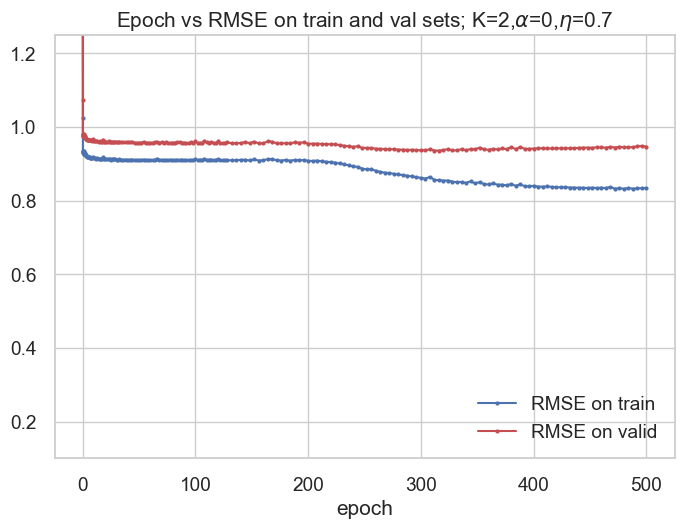

In [12]:
# First, with no regularization (α=0), train this model using SGD. 
# Try three possible values of K: 2, 10, and 50.

# attempt_train(K=2, alpha=0, step_size=2.5, n_epochs=20)
# very high learning rate, diverged super quickly

# attempt_train(K=2, alpha=0, step_size=1.0, n_epochs=20)
# lower learning rate, still diverged, and loss got large, but slower...

attempt_train(K=2, alpha=0, step_size=0.7, n_epochs=500, file_name="fig-1a-1.png")



In [7]:
# attempt_train(K=10, alpha=0, step_size=2.5, n_epochs=20)
# attempt_train(K=10, alpha=0, step_size=1.5, n_epochs=20)
# attempt_train(K=10, alpha=0, step_size=1.1, n_epochs=20)
attempt_train(K=10, alpha=0, step_size=0.7, n_epochs=500, file_name="fig-1a-2.png")

epoch       0.000 | loss_total    50.39866 | tr RMSE     7.12275 | va RMSE     7.11200 | grad_wrt_mu    14.07908 | grad_wrt_b_per_user     0.01493 | grad_wrt_c_per_item     0.00837 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.014 | loss_total     8.70469 | tr RMSE     2.98114 | va RMSE     3.01112 | grad_wrt_mu     5.60964 | grad_wrt_b_per_user     0.00595 | grad_wrt_c_per_item     0.00334 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.029 | loss_total     2.14172 | tr RMSE     1.45140 | va RMSE     1.46827 | grad_wrt_mu     2.24924 | grad_wrt_b_per_user     0.00243 | grad_wrt_c_per_item     0.00138 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.043 | loss_total     1.11010 | tr RMSE     1.04611 | va RMSE     1.09370 | grad_wrt_mu     0.90037 | grad_wrt_b_per_user     0.00137 | grad_wrt_c_per_item     0.00080 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.129 | loss_total     0.86515 | tr RMSE     0.93447 | va RMSE  

KeyboardInterrupt: 

epoch       0.000 | loss_total    51.38708 | tr RMSE     7.12275 | va RMSE     7.11200 | grad_wrt_mu    14.20664 | grad_wrt_b_per_user     0.01507 | grad_wrt_c_per_item     0.00845 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.014 | loss_total    19.26569 | tr RMSE     4.44541 | va RMSE     4.47153 | grad_wrt_mu     8.59498 | grad_wrt_b_per_user     0.00911 | grad_wrt_c_per_item     0.00511 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.029 | loss_total     7.40701 | tr RMSE     2.72164 | va RMSE     2.72150 | grad_wrt_mu     5.12059 | grad_wrt_b_per_user     0.00543 | grad_wrt_c_per_item     0.00304 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.043 | loss_total     3.27986 | tr RMSE     1.81491 | va RMSE     1.85290 | grad_wrt_mu     3.11717 | grad_wrt_b_per_user     0.00334 | grad_wrt_c_per_item     0.00187 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.129 | loss_total     0.77909 | tr RMSE     0.93920 | va RMSE  

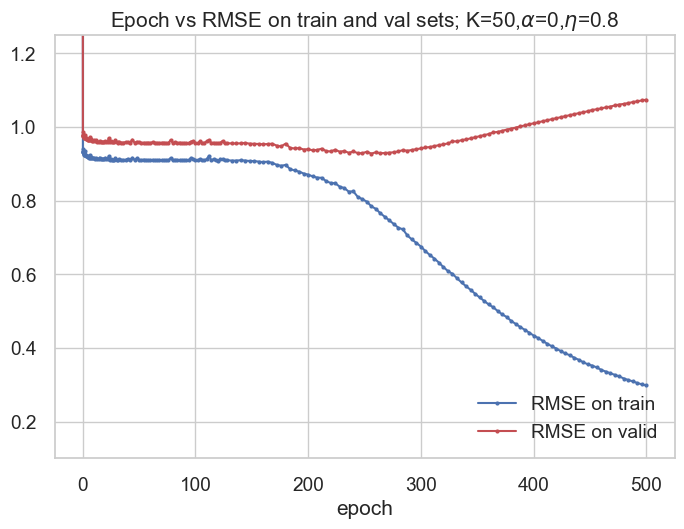

In [ ]:
# attempt_train(K=50, alpha=0, step_size=2.5, n_epochs=20)
# attempt_train(K=50, alpha=0, step_size=1.5, n_epochs=20)
# attempt_train(K=50, alpha=0, step_size=1.4, n_epochs=20)
# attempt_train(K=50, alpha=0, step_size=1.2, n_epochs=20)
# attempt_train(K=50, alpha=0, step_size=1.0, n_epochs=20)
attempt_train(K=50, alpha=0, step_size=0.8, n_epochs=500, file_name="fig-1a-3.png")


## Step 3ii

In [ ]:
# train only on K = 50
# from joblib import Parallel, delayed
# import matplotlib.pyplot as plt
# import numpy as np

# alphas = [0.01, 0.1, 1, 10]
# step_sizes = [0.001, 0.1, 0.7, 1]
# param_grid = [(step_size, alpha) for alpha in alphas for step_size in step_sizes]

# def train_model(step_size, alpha):
#     model = CollabFilterOneVectorPerItem(
#         n_factors=50,
#         batch_size=BATCH_SZ,
#         step_size=step_size,
#         alpha=alpha,
#         n_epochs=500
#     )
#     model.init_parameter_dict(n_users, n_items, train_tuple)

#     model.fit(train_tuple, valid_tuple)
    
#     # Plot
#     file_name = f"{step_size:.2f}-{alpha:.2f}-plot.png"
#     plt.figure()
#     plt.plot(model.trace_epoch, model.trace_rmse_train, 'b.-', label='RMSE on train')
#     plt.plot(model.trace_epoch, model.trace_rmse_valid, 'r.-', label='RMSE on valid')
#     plt.xlabel('epoch')
#     plt.legend(loc='lower right')
#     plt.title(f'Epoch vs RMSE on train and val sets; K=50, $\\alpha$={alpha}, $\\eta$={step_size}')
#     plt.ylim([0.1, 1.25])
#     plt.savefig(file_name, dpi=300, bbox_inches='tight')
#     plt.close()

    

# # Run in parallel
# results = Parallel(n_jobs=-1, verbose=10)(
#     delayed(train_model)(step_size, alpha) for (step_size, alpha) in param_grid
# )


In [8]:
def gs_train(alpha, eta, n_epochs=500):
    return attempt_train(K=50, alpha=alpha, step_size=eta, n_epochs=n_epochs, file_name=f"K={50},$$\\alpha$$={alpha},$$\eta$$={eta}.png")

In [ ]:
# gs_train(alpha=1, eta=0.1)

In [ ]:
# gs_train(alpha=0.5, eta=0.3)

In [ ]:
# gs_train(alpha=0.01,eta=0.5)

In [ ]:
# gs_train(alpha=0.05, eta=0.5)

In [ ]:
# gs_train(alpha=0.1, eta=0.7, n_epochs=750)

In [ ]:
# gs_train(alpha=0.1, eta=0.2, n_epochs=500)


In [ ]:
# gs_train(alpha=0.1, eta=0.8, n_epochs=500)

epoch       0.000 | loss_total    51.38708 | tr RMSE     7.12275 | va RMSE     7.11200 | grad_wrt_mu    14.20664 | grad_wrt_b_per_user     0.01507 | grad_wrt_c_per_item     0.00845 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.014 | loss_total    33.55477 | tr RMSE     5.84711 | va RMSE     5.87108 | grad_wrt_mu    11.44678 | grad_wrt_b_per_user     0.01214 | grad_wrt_c_per_item     0.00681 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.029 | loss_total    21.76879 | tr RMSE     4.66384 | va RMSE     4.65630 | grad_wrt_mu     9.14699 | grad_wrt_b_per_user     0.00970 | grad_wrt_c_per_item     0.00544 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.043 | loss_total    14.51691 | tr RMSE     3.81021 | va RMSE     3.83791 | grad_wrt_mu     7.39316 | grad_wrt_b_per_user     0.00784 | grad_wrt_c_per_item     0.00440 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.129 | loss_total     1.95368 | tr RMSE     1.40727 | va RMSE  

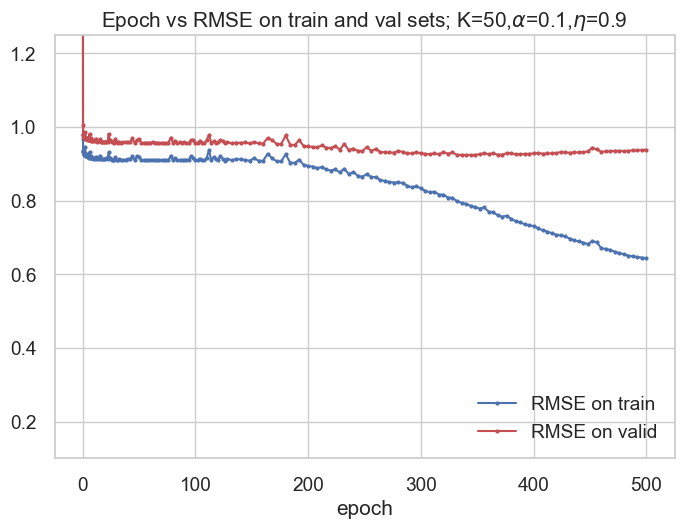

In [9]:
best_model__1b = gs_train(alpha=0.1, eta=0.9, n_epochs=500)


In [ ]:
res = map(lambda kv : (kv[0], kv[1]), best_model__1b.param_dict.items())

import pickle

with open("param_dict_1b.pkl", "wb") as f:
    pickle.dump(best_model__1b.param_dict, f)



In [ ]:
best_index = np.argmin(best_model__1b.trace_rmse_valid)

best_model__1b.trace_epoch[best_index]



344.0

epoch       0.000 | loss_total    51.38708 | tr RMSE     7.12275 | va RMSE     7.11200 | grad_wrt_mu    14.20664 | grad_wrt_b_per_user     0.01507 | grad_wrt_c_per_item     0.00845 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.014 | loss_total    19.26569 | tr RMSE     4.44541 | va RMSE     4.47153 | grad_wrt_mu     8.59498 | grad_wrt_b_per_user     0.00911 | grad_wrt_c_per_item     0.00511 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.029 | loss_total     7.40701 | tr RMSE     2.72164 | va RMSE     2.72150 | grad_wrt_mu     5.12059 | grad_wrt_b_per_user     0.00543 | grad_wrt_c_per_item     0.00304 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.043 | loss_total     3.27986 | tr RMSE     1.81491 | va RMSE     1.85290 | grad_wrt_mu     3.11717 | grad_wrt_b_per_user     0.00334 | grad_wrt_c_per_item     0.00187 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.129 | loss_total     0.77909 | tr RMSE     0.93920 | va RMSE  

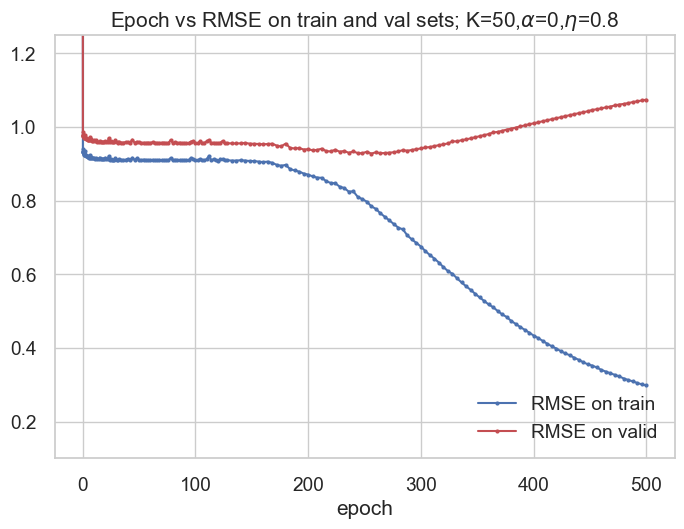

In [36]:


best_model__1a_K50 = attempt_train(K=50, alpha=0, step_size=0.8, n_epochs=500, file_name="fig-1a-3.png")





epoch       0.000 | loss_total    50.39866 | tr RMSE     7.12275 | va RMSE     7.11200 | grad_wrt_mu    14.07908 | grad_wrt_b_per_user     0.01493 | grad_wrt_c_per_item     0.00837 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.014 | loss_total    18.62939 | tr RMSE     4.34566 | va RMSE     4.37155 | grad_wrt_mu     8.43597 | grad_wrt_b_per_user     0.00895 | grad_wrt_c_per_item     0.00502 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.029 | loss_total     7.34872 | tr RMSE     2.69680 | va RMSE     2.69713 | grad_wrt_mu     5.08796 | grad_wrt_b_per_user     0.00540 | grad_wrt_c_per_item     0.00302 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.043 | loss_total     3.26756 | tr RMSE     1.81516 | va RMSE     1.85260 | grad_wrt_mu     3.07270 | grad_wrt_b_per_user     0.00329 | grad_wrt_c_per_item     0.00185 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.129 | loss_total     0.89031 | tr RMSE     0.94600 | va RMSE  

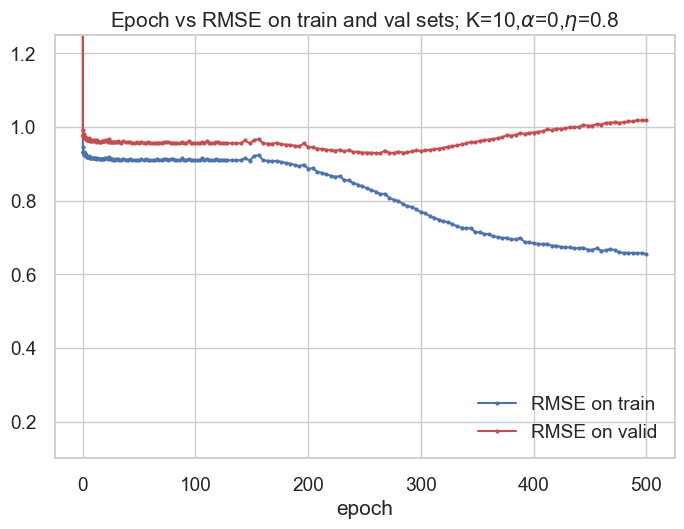

In [37]:
best_model__1a_K10 = attempt_train(K=10, alpha=0, step_size=0.8, n_epochs=500)

epoch       0.000 | loss_total    51.16992 | tr RMSE     7.12275 | va RMSE     7.11200 | grad_wrt_mu    14.18371 | grad_wrt_b_per_user     0.01504 | grad_wrt_c_per_item     0.00843 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.014 | loss_total     9.42301 | tr RMSE     3.05085 | va RMSE     3.08084 | grad_wrt_mu     5.84141 | grad_wrt_b_per_user     0.00620 | grad_wrt_c_per_item     0.00347 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.029 | loss_total     2.13610 | tr RMSE     1.52088 | va RMSE     1.53573 | grad_wrt_mu     2.30438 | grad_wrt_b_per_user     0.00248 | grad_wrt_c_per_item     0.00140 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.043 | loss_total     1.05486 | tr RMSE     1.02435 | va RMSE     1.07207 | grad_wrt_mu     0.86438 | grad_wrt_b_per_user     0.00134 | grad_wrt_c_per_item     0.00078 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.129 | loss_total     0.92062 | tr RMSE     0.93465 | va RMSE  

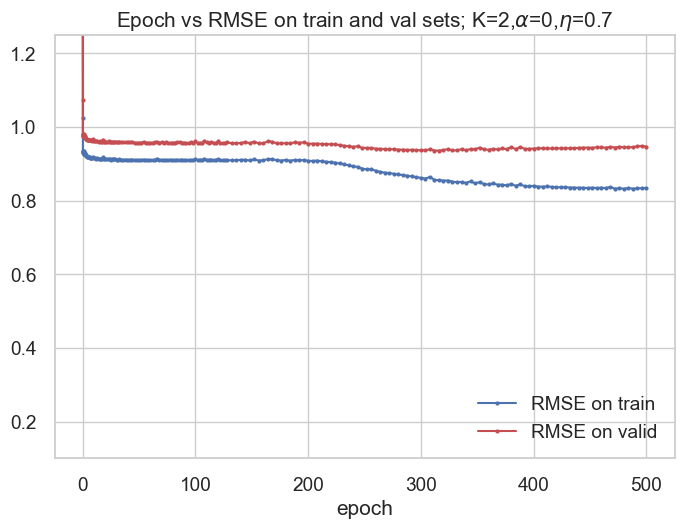

In [38]:
best_model_1a_K2 = attempt_train(K=2, alpha=0, step_size=0.7,n_epochs=500)

In [ ]:
def plot_model_metrics(model):
    if model is None:
        raise ValueError("need to call fit first")
    
    plt.plot(model.trace_epoch, model.trace_rmse_train, 'b.-', label='RMSE on train')
    plt.plot(model.trace_epoch, model.trace_rmse_valid, 'r.-', label='RMSE on valid')

    plt.xlabel('epoch');
    plt.legend(loc='lower right');
    plt.title(f'Epoch vs RMSE on train and val sets; K={model.n_factors},$\\alpha$={model.alpha},$\eta$={model.step_size}')
    plt.ylim([0.1, 1.25])
    plt.show()
    plt.close()
    
    plt.plot(model.trace_epoch, model.trace_mae_train, 'b.-', label='MAE on train')
    plt.plot(model.trace_epoch, model.trace_mae_valid, 'r.-', label='MAE on valid')

    plt.xlabel('epoch');
    plt.legend(loc='lower right');
    plt.title(f'Epoch vs MAE on train and val sets; K={model.n_factors},$\\alpha$={model.alpha},$\eta$={model.step_size}')
    plt.ylim([0.1, 1.25])
    plt.show()
    plt.close()
    

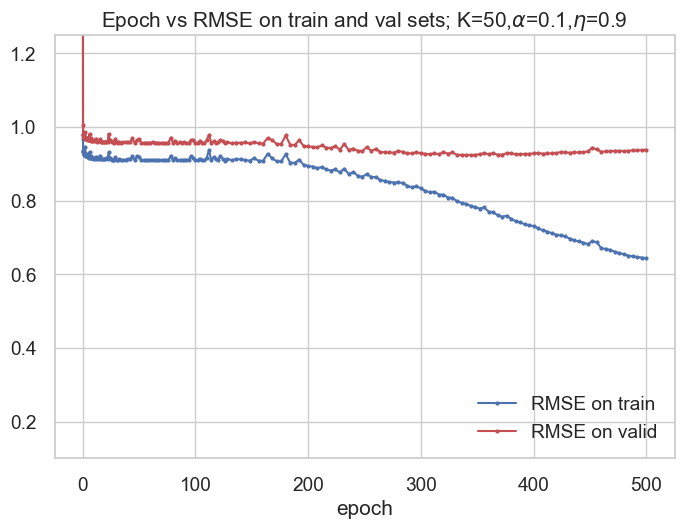

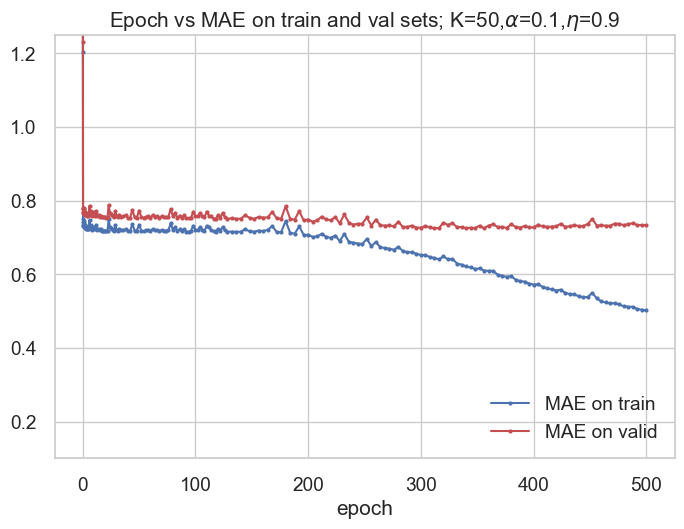

In [ ]:
plot_model_metrics(best_model__1b)

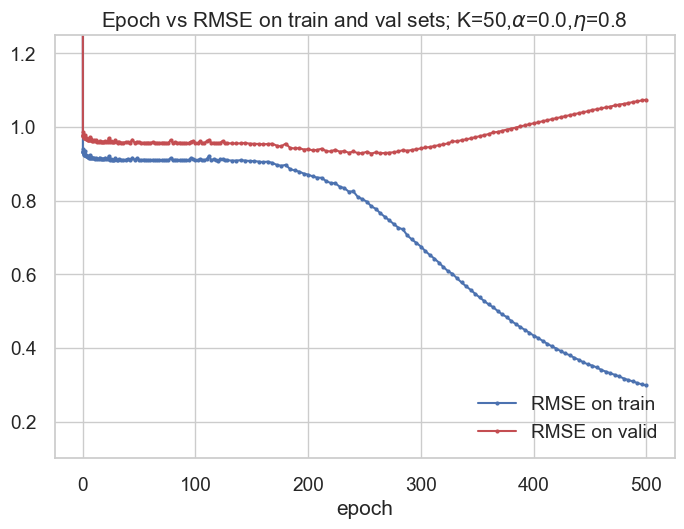

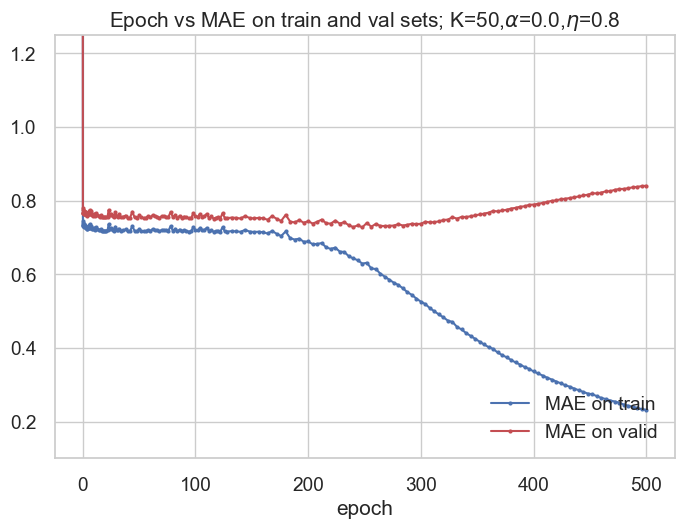

In [ ]:
plot_model_metrics(best_model__1a_K50)

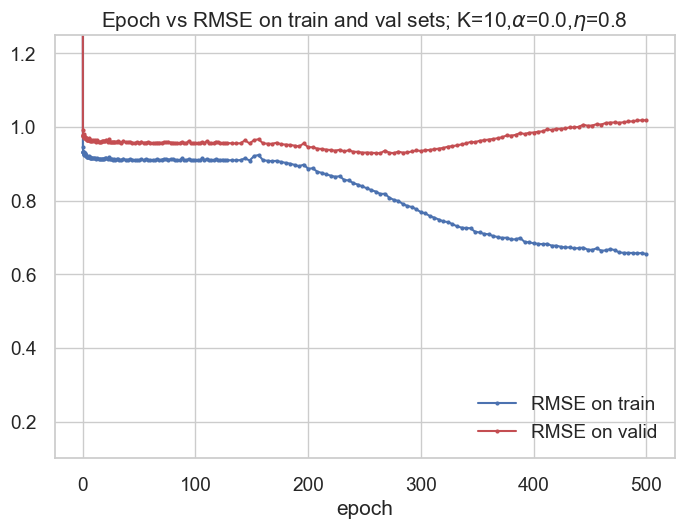

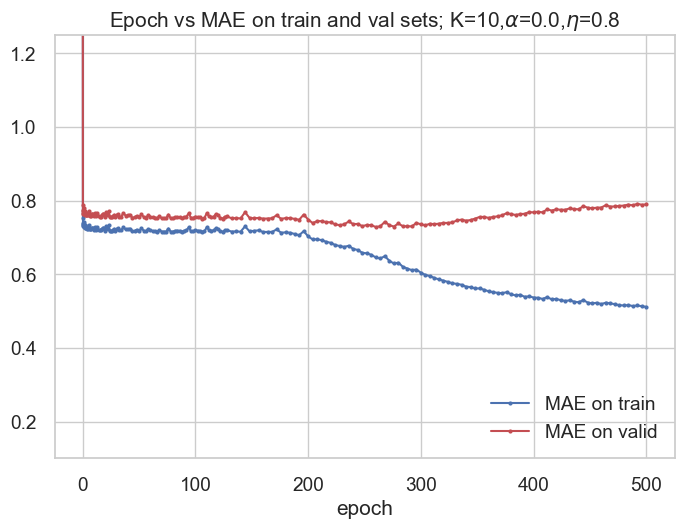

In [ ]:
plot_model_metrics(best_model__1a_K10)

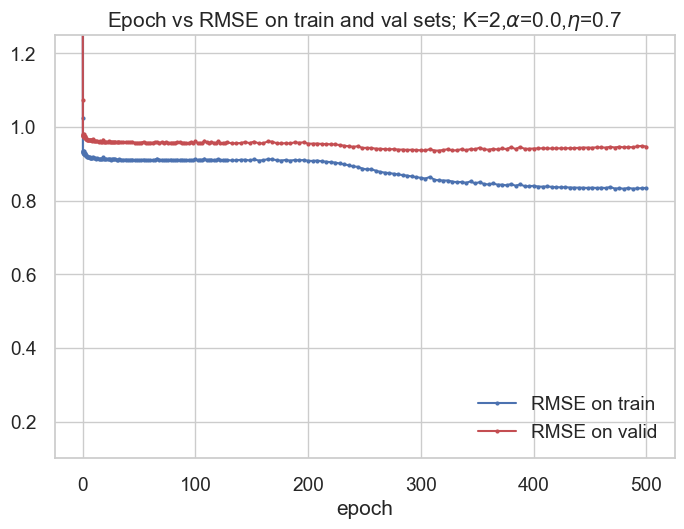

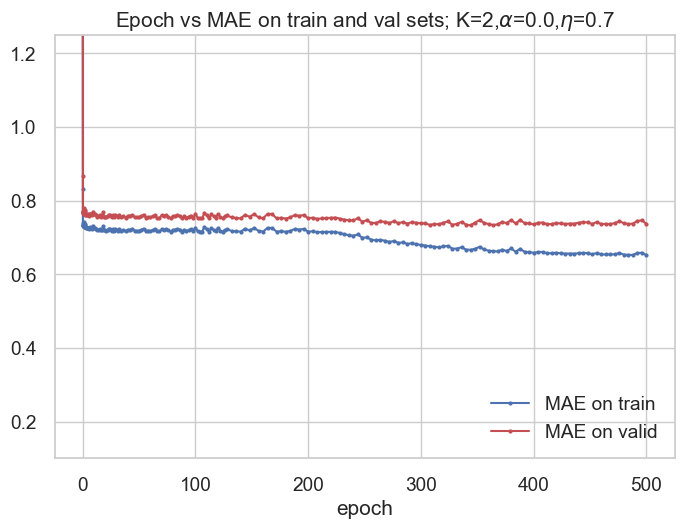

In [ ]:
plot_model_metrics(best_model_1a_K2)

In [17]:
def get_best_metrics(model):
    if model is None:
        raise ValueError("need to call fit first")
    
    best_mae_idx = np.argmin(model.trace_mae_valid)
    best_rmse_idx = np.argmin(model.trace_rmse_valid)
    
    best_mae_epoch = model.trace_epoch[best_mae_idx]
    best_rmse_epoch = model.trace_epoch[best_rmse_idx]
    
    return int(best_mae_epoch), int(best_rmse_epoch)
    

In [39]:
best_n_epochs = []

best_n_epochs.append(get_best_metrics(best_model__1b))

best_n_epochs.append(get_best_metrics(best_model__1a_K50))

best_n_epochs.append(get_best_metrics(best_model__1a_K10))

best_n_epochs.append(get_best_metrics(best_model_1a_K2))

best_n_epochs

[(356, 344), (248, 256), (260, 264), (344, 316)]

In [ ]:
# maybe we should do some early stopping. based on these findings

# retrain with new n_epochs

In [40]:
best_n_epochs_MAE_models = []
best_n_epochs_RMSE_models = []

print(best_n_epochs)

[(356, 344), (248, 256), (260, 264), (344, 316)]


epoch       0.000 | loss_total    51.38708 | tr RMSE     7.12275 | va RMSE     7.11200 | grad_wrt_mu    14.20664 | grad_wrt_b_per_user     0.01507 | grad_wrt_c_per_item     0.00845 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.014 | loss_total    33.55477 | tr RMSE     5.84711 | va RMSE     5.87108 | grad_wrt_mu    11.44678 | grad_wrt_b_per_user     0.01214 | grad_wrt_c_per_item     0.00681 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.029 | loss_total    21.76879 | tr RMSE     4.66384 | va RMSE     4.65630 | grad_wrt_mu     9.14699 | grad_wrt_b_per_user     0.00970 | grad_wrt_c_per_item     0.00544 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.043 | loss_total    14.51691 | tr RMSE     3.81021 | va RMSE     3.83791 | grad_wrt_mu     7.39316 | grad_wrt_b_per_user     0.00784 | grad_wrt_c_per_item     0.00440 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.129 | loss_total     1.95368 | tr RMSE     1.40727 | va RMSE  

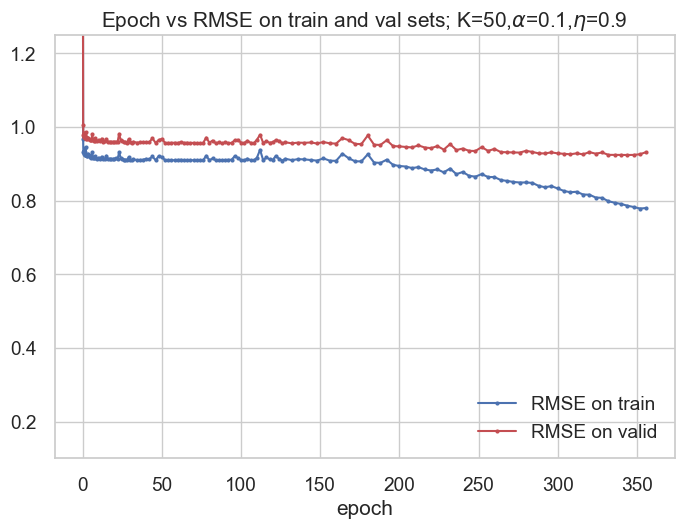

epoch       0.000 | loss_total    51.38708 | tr RMSE     7.12275 | va RMSE     7.11200 | grad_wrt_mu    14.20664 | grad_wrt_b_per_user     0.01507 | grad_wrt_c_per_item     0.00845 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.014 | loss_total    33.55477 | tr RMSE     5.84711 | va RMSE     5.87108 | grad_wrt_mu    11.44678 | grad_wrt_b_per_user     0.01214 | grad_wrt_c_per_item     0.00681 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.029 | loss_total    21.76879 | tr RMSE     4.66384 | va RMSE     4.65630 | grad_wrt_mu     9.14699 | grad_wrt_b_per_user     0.00970 | grad_wrt_c_per_item     0.00544 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.043 | loss_total    14.51691 | tr RMSE     3.81021 | va RMSE     3.83791 | grad_wrt_mu     7.39316 | grad_wrt_b_per_user     0.00784 | grad_wrt_c_per_item     0.00440 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.129 | loss_total     1.95368 | tr RMSE     1.40727 | va RMSE  

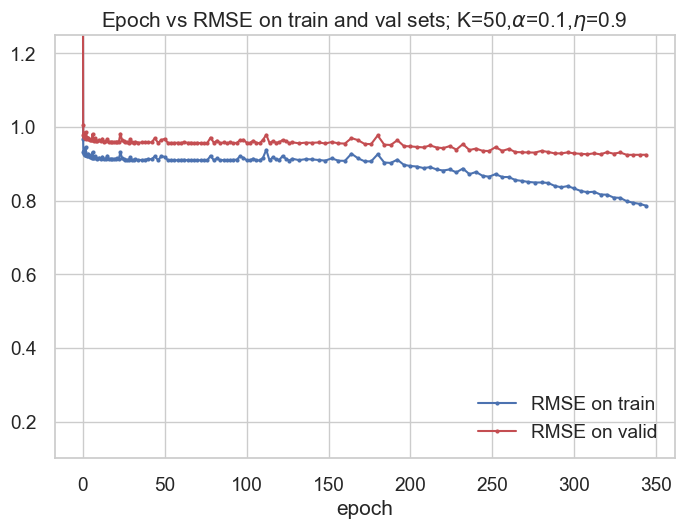

epoch       0.000 | loss_total    51.38708 | tr RMSE     7.12275 | va RMSE     7.11200 | grad_wrt_mu    14.20664 | grad_wrt_b_per_user     0.01507 | grad_wrt_c_per_item     0.00845 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.014 | loss_total    19.26569 | tr RMSE     4.44541 | va RMSE     4.47153 | grad_wrt_mu     8.59498 | grad_wrt_b_per_user     0.00911 | grad_wrt_c_per_item     0.00511 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.029 | loss_total     7.40701 | tr RMSE     2.72164 | va RMSE     2.72150 | grad_wrt_mu     5.12059 | grad_wrt_b_per_user     0.00543 | grad_wrt_c_per_item     0.00304 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.043 | loss_total     3.27986 | tr RMSE     1.81491 | va RMSE     1.85290 | grad_wrt_mu     3.11717 | grad_wrt_b_per_user     0.00334 | grad_wrt_c_per_item     0.00187 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.129 | loss_total     0.77909 | tr RMSE     0.93920 | va RMSE  

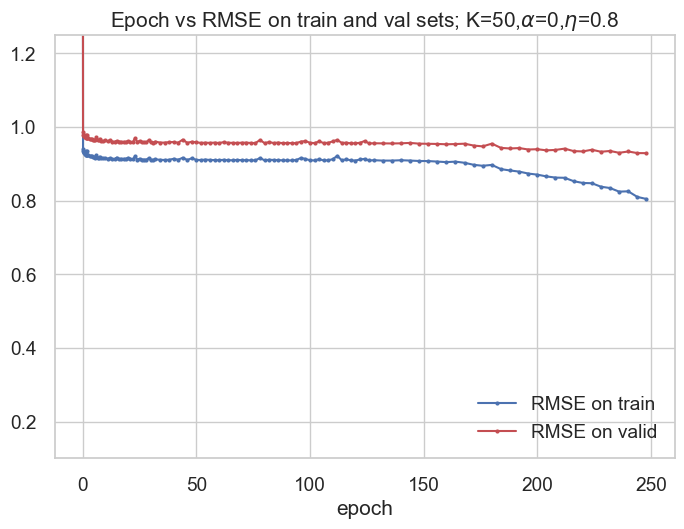

epoch       0.000 | loss_total    51.38708 | tr RMSE     7.12275 | va RMSE     7.11200 | grad_wrt_mu    14.20664 | grad_wrt_b_per_user     0.01507 | grad_wrt_c_per_item     0.00845 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.014 | loss_total    19.26569 | tr RMSE     4.44541 | va RMSE     4.47153 | grad_wrt_mu     8.59498 | grad_wrt_b_per_user     0.00911 | grad_wrt_c_per_item     0.00511 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.029 | loss_total     7.40701 | tr RMSE     2.72164 | va RMSE     2.72150 | grad_wrt_mu     5.12059 | grad_wrt_b_per_user     0.00543 | grad_wrt_c_per_item     0.00304 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.043 | loss_total     3.27986 | tr RMSE     1.81491 | va RMSE     1.85290 | grad_wrt_mu     3.11717 | grad_wrt_b_per_user     0.00334 | grad_wrt_c_per_item     0.00187 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.129 | loss_total     0.77909 | tr RMSE     0.93920 | va RMSE  

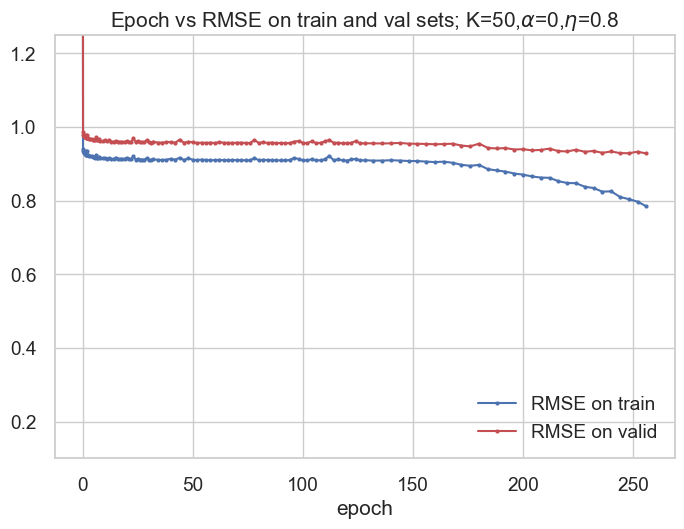

epoch       0.000 | loss_total    50.39866 | tr RMSE     7.12275 | va RMSE     7.11200 | grad_wrt_mu    14.07908 | grad_wrt_b_per_user     0.01493 | grad_wrt_c_per_item     0.00837 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.014 | loss_total     8.70469 | tr RMSE     2.98114 | va RMSE     3.01112 | grad_wrt_mu     5.60964 | grad_wrt_b_per_user     0.00595 | grad_wrt_c_per_item     0.00334 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.029 | loss_total     2.14172 | tr RMSE     1.45140 | va RMSE     1.46827 | grad_wrt_mu     2.24924 | grad_wrt_b_per_user     0.00243 | grad_wrt_c_per_item     0.00138 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.043 | loss_total     1.11010 | tr RMSE     1.04611 | va RMSE     1.09370 | grad_wrt_mu     0.90037 | grad_wrt_b_per_user     0.00137 | grad_wrt_c_per_item     0.00080 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.129 | loss_total     0.86515 | tr RMSE     0.93447 | va RMSE  

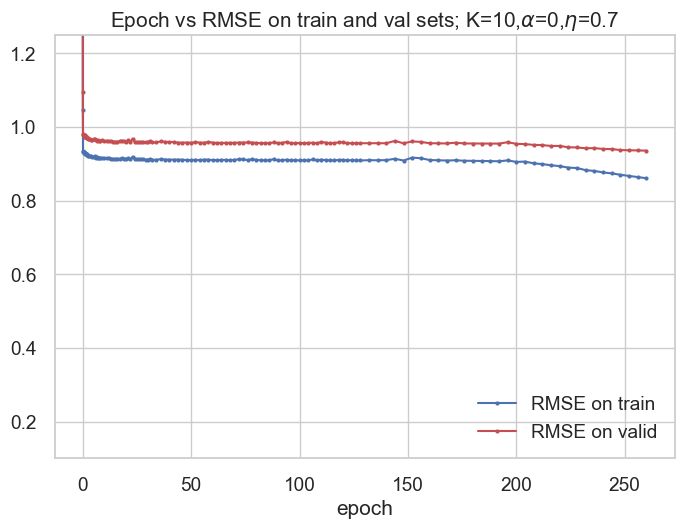

epoch       0.000 | loss_total    50.39866 | tr RMSE     7.12275 | va RMSE     7.11200 | grad_wrt_mu    14.07908 | grad_wrt_b_per_user     0.01493 | grad_wrt_c_per_item     0.00837 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.014 | loss_total     8.70469 | tr RMSE     2.98114 | va RMSE     3.01112 | grad_wrt_mu     5.60964 | grad_wrt_b_per_user     0.00595 | grad_wrt_c_per_item     0.00334 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.029 | loss_total     2.14172 | tr RMSE     1.45140 | va RMSE     1.46827 | grad_wrt_mu     2.24924 | grad_wrt_b_per_user     0.00243 | grad_wrt_c_per_item     0.00138 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.043 | loss_total     1.11010 | tr RMSE     1.04611 | va RMSE     1.09370 | grad_wrt_mu     0.90037 | grad_wrt_b_per_user     0.00137 | grad_wrt_c_per_item     0.00080 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.129 | loss_total     0.86515 | tr RMSE     0.93447 | va RMSE  

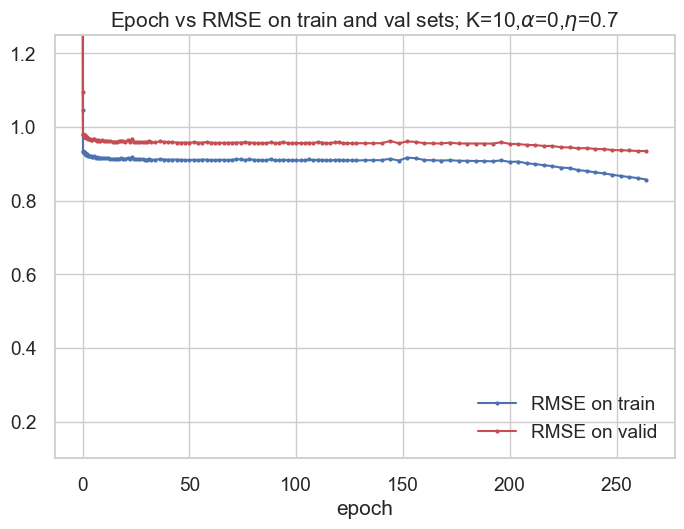

epoch       0.000 | loss_total    51.16992 | tr RMSE     7.12275 | va RMSE     7.11200 | grad_wrt_mu    14.18371 | grad_wrt_b_per_user     0.01504 | grad_wrt_c_per_item     0.00843 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.014 | loss_total     9.42301 | tr RMSE     3.05085 | va RMSE     3.08084 | grad_wrt_mu     5.84141 | grad_wrt_b_per_user     0.00620 | grad_wrt_c_per_item     0.00347 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.029 | loss_total     2.13610 | tr RMSE     1.52088 | va RMSE     1.53573 | grad_wrt_mu     2.30438 | grad_wrt_b_per_user     0.00248 | grad_wrt_c_per_item     0.00140 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.043 | loss_total     1.05486 | tr RMSE     1.02435 | va RMSE     1.07207 | grad_wrt_mu     0.86438 | grad_wrt_b_per_user     0.00134 | grad_wrt_c_per_item     0.00078 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.129 | loss_total     0.92062 | tr RMSE     0.93465 | va RMSE  

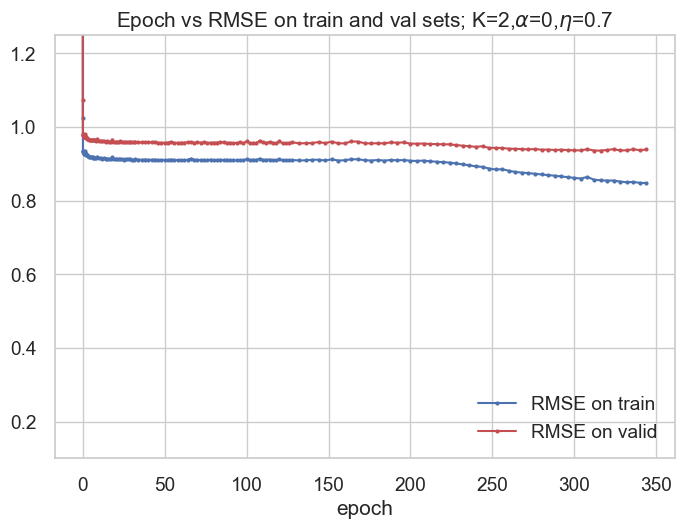

epoch       0.000 | loss_total    51.16992 | tr RMSE     7.12275 | va RMSE     7.11200 | grad_wrt_mu    14.18371 | grad_wrt_b_per_user     0.01504 | grad_wrt_c_per_item     0.00843 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.014 | loss_total     9.42301 | tr RMSE     3.05085 | va RMSE     3.08084 | grad_wrt_mu     5.84141 | grad_wrt_b_per_user     0.00620 | grad_wrt_c_per_item     0.00347 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.029 | loss_total     2.13610 | tr RMSE     1.52088 | va RMSE     1.53573 | grad_wrt_mu     2.30438 | grad_wrt_b_per_user     0.00248 | grad_wrt_c_per_item     0.00140 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.043 | loss_total     1.05486 | tr RMSE     1.02435 | va RMSE     1.07207 | grad_wrt_mu     0.86438 | grad_wrt_b_per_user     0.00134 | grad_wrt_c_per_item     0.00078 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.129 | loss_total     0.92062 | tr RMSE     0.93465 | va RMSE  

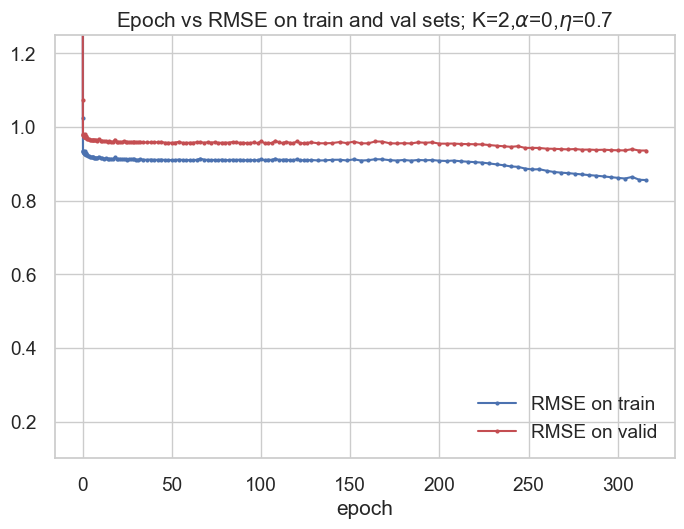

In [41]:

for i, (mae_epoch, rmse_epoch) in enumerate(best_n_epochs):
     # best_n_epochs_MAE_models.append(attempt_train(K=2,alpha=0, step_size=0.7, n_epochs=mae_epoch))
     # best_n_epochs_RMSE_models.append(attempt_train(K=2,alpha=0, step_size=0.7, n_epochs=rmse_epoch))
     # break
     match i:
          case 0:
               best_n_epochs_MAE_models.append(attempt_train(K=50,alpha=0.1, step_size=0.9, n_epochs=mae_epoch))
               best_n_epochs_RMSE_models.append(attempt_train(K=50,alpha=0.1, step_size=0.9, n_epochs=rmse_epoch))
          case 1:
               best_n_epochs_MAE_models.append(attempt_train(K=50,alpha=0, step_size=0.8, n_epochs=mae_epoch))
               best_n_epochs_RMSE_models.append(attempt_train(K=50,alpha=0, step_size=0.8, n_epochs=rmse_epoch))
          case 2:
               best_n_epochs_MAE_models.append(attempt_train(K=10,alpha=0, step_size=0.7, n_epochs=mae_epoch))
               best_n_epochs_RMSE_models.append(attempt_train(K=10,alpha=0, step_size=0.7, n_epochs=rmse_epoch))
          case 3:
               best_n_epochs_MAE_models.append(attempt_train(K=2,alpha=0, step_size=0.7, n_epochs=mae_epoch))
               best_n_epochs_RMSE_models.append(attempt_train(K=2,alpha=0, step_size=0.7, n_epochs=rmse_epoch))

In [33]:
user_ids_T, item_ids_T, ratings_T = test_tuple




In [11]:
dict_list = []
for model in best_n_epochs_RMSE_models:

    # print(f'argmin, np.min, len   {np.argmin(model.trace_rmse_valid), 
    #                 np.min(model.trace_rmse_valid), len(model.trace_rmse_valid)}')
    
    print(f"min RMSE for model {np.min(model.trace_rmse_valid)} with K={model.n_factors} alpha={model.alpha}")
    
    

Let's make a plot for the PCA!


In [19]:
import pandas as pd
import os

In [20]:
DATA_PATH = 'data_movie_lens_100k/' # TODO fixme: Path to where dataset csv files live on your system
if not os.path.exists(os.path.join(DATA_PATH, 'select_movies.csv')):
    try:
        DATA_PATH = os.path.join(os.environ.get("HOME", ""),
                    'courses/cs135-25s-staffonly/proj_src/projB/data_movie_lens_100k/')
        assert os.path.exists(os.path.join(DATA_PATH, 'select_movies.csv'))
    except AssertionError:
        print("Please store path to movie_lens_100k dataset in DATA_PATH")

assert os.path.exists(os.path.join(DATA_PATH, 'select_movies.csv'))

select_movies_df = pd.read_csv(os.path.join(DATA_PATH, 'select_movies.csv'))


In [21]:
item_ids = np.unique(train_tuple[1])  # unique item_ids in training data
raw_to_model_index = {item_id: idx for idx, item_id in enumerate(item_ids)}



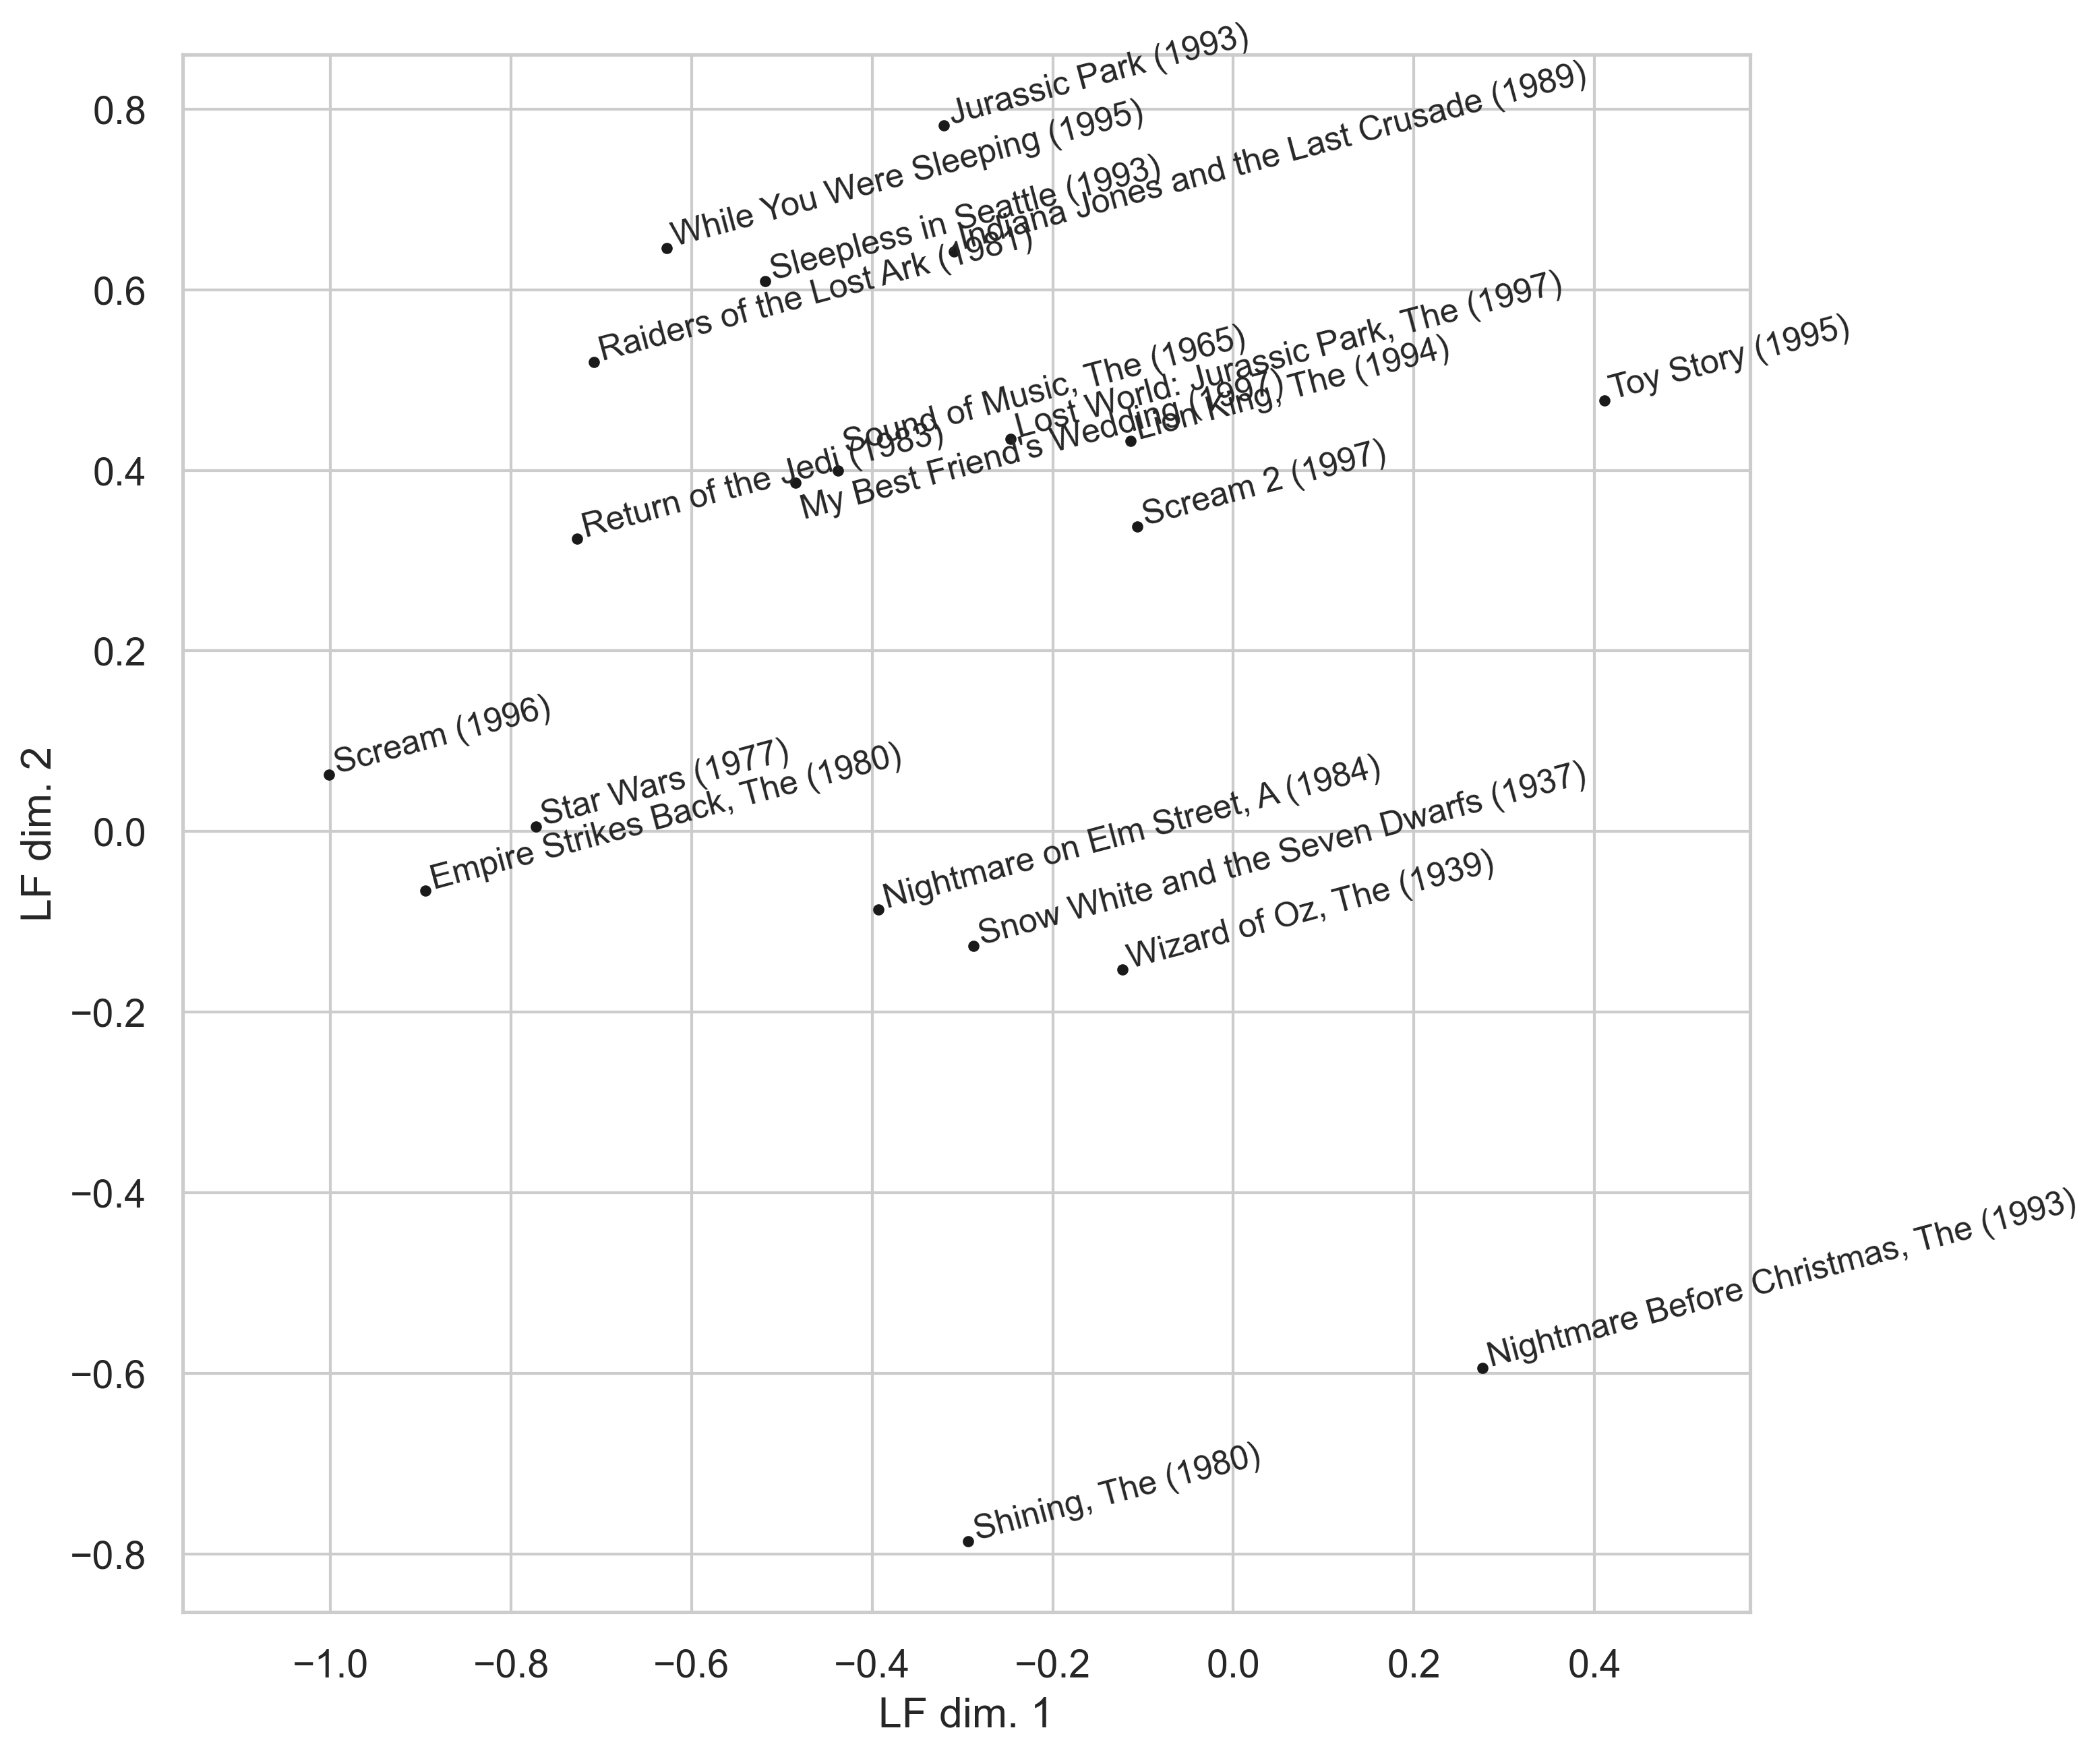

In [28]:
import matplotlib.pyplot as plt
import numpy as np

K2__model = best_n_epochs_RMSE_models[0]
assert K2__model.param_dict["V"].shape == (n_items, 2)
item_vecs = K2__model.param_dict["V"]  # shape: (n_items, 2)
B = 0.002

plt.figure(figsize=(10, 10), dpi=300)

for sid, raw_itemid in enumerate(select_movies_df['item_id']):
    title = select_movies_df['title'].iloc[sid]

    if raw_itemid not in raw_to_model_index:
        continue  # skip if movie wasn't in training set

    idx = raw_to_model_index[raw_itemid]
    vec = item_vecs[idx]

    # plot the item as a point
    plt.plot(vec[0], vec[1], 'k.', markersize=8)

    if "Wedding" in title:
        curBy = -20 * B
    elif "Sound of Music" in title:
        curBy = 10 * B
    else:
        curBy = B

    # plot the title
    plt.text(vec[0] + B, vec[1] + curBy, title, rotation=15, fontsize=12)

plt.xlabel("LF dim. 1")
plt.ylabel("LF dim. 2")
plt.axis("equal")
plt.grid(True)
plt.show()

epoch       0.000 | loss_total    51.38708 | tr RMSE     7.12275 | va RMSE     7.11200 | grad_wrt_mu    14.20664 | grad_wrt_b_per_user     0.01507 | grad_wrt_c_per_item     0.00845 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.014 | loss_total    33.55477 | tr RMSE     5.84711 | va RMSE     5.87108 | grad_wrt_mu    11.44678 | grad_wrt_b_per_user     0.01214 | grad_wrt_c_per_item     0.00681 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.029 | loss_total    21.76879 | tr RMSE     4.66384 | va RMSE     4.65630 | grad_wrt_mu     9.14699 | grad_wrt_b_per_user     0.00970 | grad_wrt_c_per_item     0.00544 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.043 | loss_total    14.51691 | tr RMSE     3.81021 | va RMSE     3.83791 | grad_wrt_mu     7.39316 | grad_wrt_b_per_user     0.00784 | grad_wrt_c_per_item     0.00440 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.129 | loss_total     1.95368 | tr RMSE     1.40727 | va RMSE  

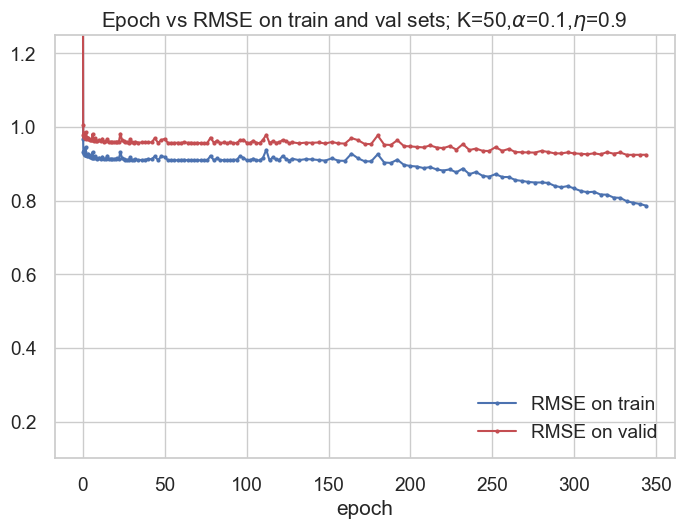

In [31]:
best1b__model = attempt_train(K=50,alpha=0.1, step_size=0.9, n_epochs=344)

In [32]:
best_model__1b

In [ ]:
best_model__1b.evaluate_perf_metrics(user_ids_T, item_ids_T, ratings_T )





{'rmse': 0.938239323427104, 'mae': 0.7322516990088126}

In [48]:
best_n_epochs_RMSE_models

for model in best_n_epochs_RMSE_models:
    print(model.alpha, model.n_factors)
    print('train', model.evaluate_perf_metrics(*train_tuple))
    print('valid', model.evaluate_perf_metrics(*valid_tuple))
    print('test', model.evaluate_perf_metrics(user_ids_T, item_ids_T, ratings_T ))

0.1 50
train {'rmse': 0.7860842795067357, 'mae': 0.6184401831217622}
valid {'rmse': 0.923864478362366, 'mae': 0.726481808654495}
test {'rmse': 0.9274189653617154, 'mae': 0.7203436120867387}
0.0 50
train {'rmse': 0.7845577312062573, 'mae': 0.6156835515252427}
valid {'rmse': 0.9276117242411199, 'mae': 0.7292338274639308}
test {'rmse': 0.9303031956856702, 'mae': 0.7228111345678172}
0.0 10
train {'rmse': 0.8569106690159214, 'mae': 0.6756568575259815}
valid {'rmse': 0.9341084431107676, 'mae': 0.7371052428683696}
test {'rmse': 0.9398772256579129, 'mae': 0.7317245009639936}
0.0 2
train {'rmse': 0.855194636264889, 'mae': 0.6730893440316119}
valid {'rmse': 0.9358420784099566, 'mae': 0.7356649955856429}
test {'rmse': 0.9432490678832617, 'mae': 0.7323501457329814}


In [49]:

def load_train_valid_test_datasets_random(
        data_path='data_movie_lens_100k/',
        n_valid=9992, # don't change this!
        n_test=10000, # don't change this!
        total_n_users=943,
        total_n_items=1682):
    ''' Load predefined train, valid, and test datasets from CSV file on disk.

    Returns
    -------
    train_data : tuple
    valid_data : tuple
    test_data : tuple
    total_n_users : int
    total_n_items : int
    '''

    ## Load the development set
    try:
        all_df = pd.read_csv(
            os.path.join(data_path, "ratings_all_development_set.csv"))
    except IOError:
        # Just in case, in case directory is wrong, one less deep
        all_df = pd.read_csv(
            os.path.join('..', data_path, "ratings_all_development_set.csv"))
    L = all_df.shape[0]
    all_rows = np.arange(L)
    
    rng = np.random.RandomState(135)
    shuffled_rows = rng.permutation(all_rows)
    
    all_rows = shuffled_rows

    
    ## Divide into predefined splits
    test_rows = all_rows[:n_test]
    valid_rows = all_rows[n_test:(n_test+n_valid)]
    train_rows = all_rows[(n_test+n_valid):]

    assert np.intersect1d(train_rows, valid_rows).size == 0
    assert np.intersect1d(train_rows, test_rows).size == 0
    assert np.intersect1d(valid_rows, test_rows).size == 0

    all_data_tuple = (
        all_df['user_id'].values,
        all_df['item_id'].values,
        all_df['rating'].values)

    train_data_tuple = (
        all_df['user_id'].values[train_rows],
        all_df['item_id'].values[train_rows],
        all_df['rating'].values[train_rows])
    valid_data_tuple = (
        all_df['user_id'].values[valid_rows],
        all_df['item_id'].values[valid_rows],
        all_df['rating'].values[valid_rows])
    test_data_tuple = (
        all_df['user_id'].values[test_rows],
        all_df['item_id'].values[test_rows],
        all_df['rating'].values[test_rows])

    for dtuple in [all_data_tuple,
            train_data_tuple, valid_data_tuple, test_data_tuple]:
        assert np.all(dtuple[0] < total_n_users)
        assert np.all(dtuple[1] < total_n_items)

    return (
        train_data_tuple, valid_data_tuple, test_data_tuple,
        total_n_users, total_n_items)



In [51]:
train_tuple, valid_tuple, test_tuple, n_users, n_items = load_train_valid_test_datasets_random()

for model in best_n_epochs_RMSE_models:
    print(model.alpha, model.n_factors)
    print('train', model.evaluate_perf_metrics(*train_tuple))
    print('valid', model.evaluate_perf_metrics(*valid_tuple))
    print('test', model.evaluate_perf_metrics(*test_tuple))

0.1 50
train {'rmse': 0.8191785421335683, 'mae': 0.6413670296280947}
valid {'rmse': 0.8185367297290496, 'mae': 0.6439301560122555}
test {'rmse': 0.8195165583369737, 'mae': 0.6423412978625376}
0.0 50
train {'rmse': 0.8186309453737052, 'mae': 0.6395928768430577}
valid {'rmse': 0.819539637867407, 'mae': 0.6430252467293092}
test {'rmse': 0.819604011878192, 'mae': 0.6415854712131461}
0.0 10
train {'rmse': 0.8743684267394137, 'mae': 0.6875946021982828}
valid {'rmse': 0.8795039609686699, 'mae': 0.6936278144358881}
test {'rmse': 0.8779245886240161, 'mae': 0.6916029347476195}
0.0 2
train {'rmse': 0.87388570234663, 'mae': 0.6855439605802089}
valid {'rmse': 0.8777881608735721, 'mae': 0.6917890088192709}
test {'rmse': 0.8767522053897716, 'mae': 0.6890087158697598}
